In [58]:
# import keras
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D,Conv2D
from tensorflow.keras.optimizers import Adam
import tensorflow_datasets as tfds
from keras.callbacks import TensorBoard


In [59]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [60]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


2


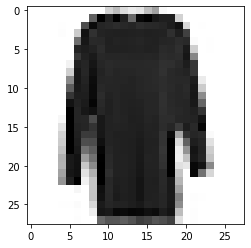

In [61]:
import matplotlib.pyplot as plt

image_index = 350
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [62]:
model= Sequential([
    Flatten(input_shape=(28,28)),
    Dense(2048, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_18 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_19 (Dense)             (None, 10)                10250     
Total params: 4,765,706
Trainable params: 4,765,706
Non-trainable params: 0
_________________________________________________________________


In [63]:
train_df = pd.read_csv(r'data/fashion-mnist_train.csv')
test_df = pd.read_csv(r'data/fashion-mnist_test.csv')
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df,dtype='float32')


x_train = train_data[:, 1:]/255
y_train = train_data[:, 0]

x_test = test_data[:, 1:]/255
y_test = test_data[:,0]

In [65]:
x_train,x_validate,y_train,y_validate = train_test_split(
     x_train,y_train, test_size=0.2, random_state=12345,
)

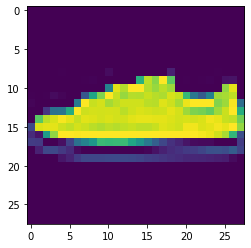

In [66]:
image = x_train[50, :].reshape((28,28))

plt.imshow(image)
plt.show()

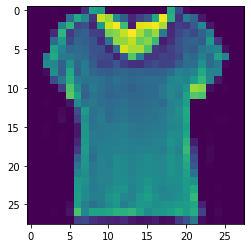

In [67]:
image = x_train[100, :].reshape((28,28))

plt.imshow(image)
plt.show()

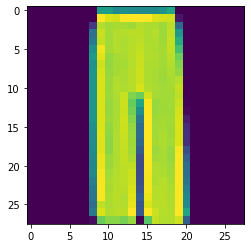

In [68]:
image = x_train[530, :].reshape((28,28))

plt.imshow(image)
plt.show()

 ## CREATE CNN

In [69]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows,im_cols, 1)


x_train = x_train.reshape(x_train.shape[0],*im_shape)
x_test= x_test.reshape(x_test.shape[0],*im_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*im_shape)

print("x_train shape:{}".format(x_train.shape))
print("x_test shape:{}".format(x_test.shape))
print("x_validate shape:{}".format(x_validate.shape))

x_train shape:(48000, 28, 28, 1)
x_test shape:(10000, 28, 28, 1)
x_validate shape:(12000, 28, 28, 1)


In [70]:
cnn_model= Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Dropout(0.2),
    
    Flatten(),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax')
])

In [73]:
tensorboard = TensorBoard(
    log_dir = r'logs\{}'.format('cnn_1layer'),
    write_graph= True,
    write_grads=True,
    histogram_freq=0,
    write_images=True
)

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy']
)

In [74]:

cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=10, verbose=1,
    validation_data=(x_validate, y_validate),
    callbacks=[tensorboard]
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47616/48000 [============================>.] - ETA: 0s - loss: 0.4859 - acc: 0.8287WARNING:tensorflow:From C:\Users\NIVESARA\Desktop\ml_project\env\lib\site-packages\keras\callbacks\tensorboard_v1.py:343: The name tf.Summary is deprecated. Please use tf.compat.v1.Summary instead.

48000/48000 [==============================] - 16s 325us/sample - loss: 0.4853 - acc: 0.8290 - val_loss: 0.4281 - val_acc: 0.8505
Epoch 2/10
48000/48000 [==============================] - 16s 332us/sample - loss: 0.4113 - acc: 0.8573 - val_loss: 0.3891 - val_acc: 0.8620
Epoch 3/10
48000/48000 [==============================] - 18s 365us/sample - loss: 0.3786 - acc: 0.8679 - val_loss: 0.3543 - val_acc: 0.8790
Epoch 4/10
48000/48000 [==============================] - 16s 334us/sample - loss: 0.3544 - acc: 0.8759 - val_loss: 0.3540 - val_acc: 0.8750
Epoch 5/10
48000/48000 [==============================] - 16s 342us/sample - loss: 0.3398 - acc: 0.8805 

In [76]:
score = cnn_model.evaluate(x_test, y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print(' test acc: {:.4f}'.format(score[1]))

test loss: 0.2829
 test acc: 0.9020
